# HW 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


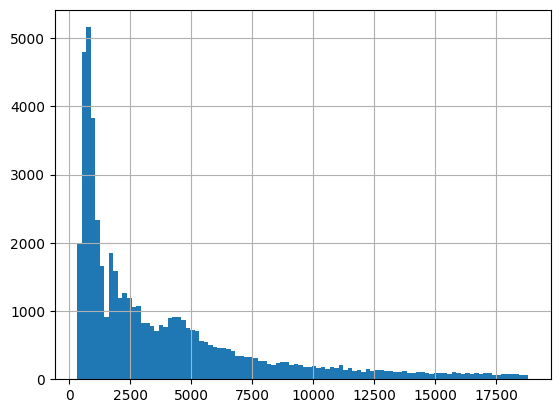

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
y_pred = reg.predict(X_test)

In [13]:
score = r2_score(y_pred, y_test)

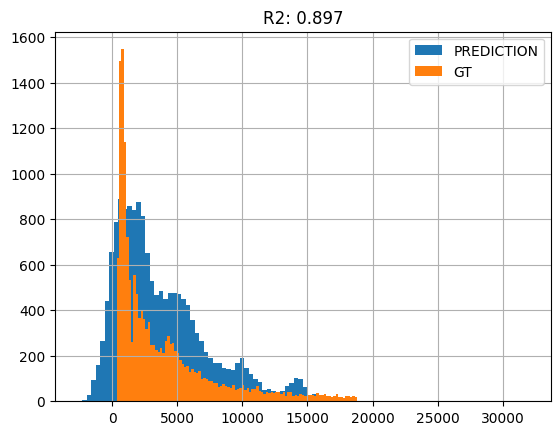

In [14]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [15]:
class LinearRegressorGD:
    def __init__(self, learning_rate=0.01, n_iter=1000, reg_type='l1', reg_strength=0.0):
        self.reg_type = reg_type
        self.lr = learning_rate
        self.max_epochs = n_iter
        self.w = None
        self.b = None
        self.reg_strength = reg_strength

    def train(self, features, target):
        features = np.array(features, dtype=float)
        target = np.array(target, dtype=float).flatten()
        self.initialize_params(features.shape[1])
        
        for epoch in range(self.max_epochs):
            grad_w, grad_b = self.calculate_gradient(features, target)
            self.w -= self.lr * grad_w
            self.b -= self.lr * grad_b

    def initialize_params(self, n_features):
        self.w = np.random.normal(0, 0.1, n_features)
        self.b = 0.0

    def get_regularization_term(self):
        if self.reg_type == "l1":
            return self.reg_strength * np.sign(self.w)
        elif self.reg_type == "l2":
            return 2 * self.reg_strength * self.w
        return np.zeros_like(self.w)

    def calculate_gradient(self, X, y):
        predictions = X.dot(self.w) + self.b
        residuals = predictions - y
        grad_b = 2.0 * np.mean(residuals)
        grad_w = (2.0 / X.shape[0]) * X.T.dot(residuals)
        grad_w += self.get_regularization_term()
        return grad_w, grad_b

    def make_prediction(self, features):
        features = np.array(features, dtype=float)
        return features.dot(self.w) + self.b

    def calculate_loss(self, features, target):
        predictions = self.make_prediction(features)
        return float(np.mean((predictions - target) ** 2))


# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [16]:
from numpy.random import RandomState

class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes: tuple = (150,),
        learning_rate: float = 2,
        n_iter: int = 2000,
        random_state: int = 42,
    ):
        self.hidden_layer_sizes = tuple(hidden_layer_sizes)
        self.learning_rate = float(learning_rate)
        self.n_iter = int(n_iter)
        self.random_state = random_state
        
        self.w = []
        self.b = []
        self._initialized = False

    def init_params(self, n_in: int, n_out: int = 1):
        self.randomizer = RandomState(self.random_state)
        
        layer_sizes = (n_in, *self.hidden_layer_sizes, n_out)
        layer_len = len(layer_sizes) - 1

        self.w, self.b = [], []
        for i in range(layer_len):
            neuron_in, neuron_out = layer_sizes[i], layer_sizes[i + 1]
            
            normalized_w = self.randomizer.normal(loc=0.0, scale=1.0, size=(neuron_in, neuron_out)).astype(np.float32)
            
            bias = np.zeros((1, neuron_out), dtype=np.float32)
            self.w.append(normalized_w)
            self.b.append(bias)

        self._initialized = True

    def sigmoid(self, coef: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-coef))
    
    def sigmoid_grad(self, x: np.ndarray) -> np.ndarray:
        return x * (1 - x)

    def forward(self, X: np.ndarray):
        if not self._initialized:
            self.init_params(X.shape[1], 1)

        output = X
        activations = []

        layer_len = len(self.w)
        for i in range(layer_len):
            temp_res = output.dot(self.w[i]) + self.b[i]
            
            if i < layer_len - 1:
                output = self.sigmoid(temp_res)
            else:
                output = temp_res
            activations.append(output)

        return output, activations

    def backward(self, X: np.ndarray, y: np.ndarray, A_list: list[np.ndarray]):
        layer_len = len(self.w)

        y_pred = A_list[-1]
        grad_first = (2 / y.shape[0]) * (y_pred - y)

        grad_w = [0] * layer_len
        grad_b = [0] * layer_len

        for i in reversed(range(layer_len)):
            if i == layer_len - 1:
                grad_second = grad_first
            else:
                grad_second = grad_first * self.sigmoid_grad(A_list[i])

            A_prev = X if i == 0 else A_list[i - 1]

            dW = A_prev.T.dot(grad_second) / y.shape[0]
            db = np.sum(grad_second, axis=0, keepdims=True) / y.shape[0]

            grad_w[i] = dW.astype(np.float32)
            grad_b[i] = db.astype(np.float32)

            grad_first = grad_second.dot(self.w[i].T)

        return grad_w, grad_b

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, epoch_to_print = 10):
        X = np.array(X, dtype=np.float32)
        y = np.array(y, dtype=np.float32)
        
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        self.init_params(X.shape[1], 1)

        for epoch in range(self.n_iter):
            pred, activations = self.forward(X)
            dW_list, db_list = self.backward(X, y, activations)

            for i in range(len(self.w)):
                self.w[i] -= self.learning_rate * dW_list[i]
                self.b[i] -= self.learning_rate * db_list[i]

            if verbose and (epoch % epoch_to_print == 0):
                loss = float(np.mean((pred - y)**2))
                print(f"Epoch {epoch}, Loss: {loss}")

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.array(X, dtype=np.float32)
        pred, _ = self.forward(X)
        return pred

In [17]:
model = MLPRegressor(n_iter = 2000, learning_rate = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Epoch 0, Loss: 31395840.0
Epoch 10, Loss: 20216036.0
Epoch 20, Loss: 16815606.0
Epoch 30, Loss: 16015365.0
Epoch 40, Loss: 15626965.0
Epoch 50, Loss: 14915671.0
Epoch 60, Loss: 13984997.0
Epoch 70, Loss: 12971801.0
Epoch 80, Loss: 11843628.0
Epoch 90, Loss: 15256431.0
Epoch 100, Loss: 10504215.0
Epoch 110, Loss: 9621625.0
Epoch 120, Loss: 13222449.0
Epoch 130, Loss: 14975644.0
Epoch 140, Loss: 9693872.0
Epoch 150, Loss: 8579481.0
Epoch 160, Loss: 8014055.0
Epoch 170, Loss: 7576987.0
Epoch 180, Loss: 6918581.5
Epoch 190, Loss: 6572994.0
Epoch 200, Loss: 6465199.5
Epoch 210, Loss: 5637812.5
Epoch 220, Loss: 5655033.5
Epoch 230, Loss: 5255513.5
Epoch 240, Loss: 4770456.5
Epoch 250, Loss: 4765759.0
Epoch 260, Loss: 4232889.0
Epoch 270, Loss: 4030628.5
Epoch 280, Loss: 3826012.5
Epoch 290, Loss: 3704544.75
Epoch 300, Loss: 3617744.5
Epoch 310, Loss: 3306545.5
Epoch 320, Loss: 3151931.5
Epoch 330, Loss: 3194216.75
Epoch 340, Loss: 3116365.5
Epoch 350, Loss: 2747490.75
Epoch 360, Loss: 262176

In [18]:
score = r2_score(y_pred, y_test)
score

0.9627367044802568